In [1]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
# Importing the Data                                                                       Shape

Endg_Truth = loadmat('end6_groundTruth.mat')      
Ground_Truth = loadmat('groundTruth.mat')               
Urban = loadmat('Urban_R162.mat')                 
image = Urban['Y'].T                                                                #    94249*162  
groundTruth = Ground_Truth ['groundTruth']                                          #     307*307
image_shape = (Ground_Truth ['nRow'], Ground_Truth ['nCol'], image.shape[1])


def hyper_to_2D(img):
    """
    
    Converts a 3D HSI cube (m x n x p) to a 2D matrix of points (N X p)
+   N = m*n, p := number of bands

    """
    img = np.array(img)
    ndim = img.ndim

    if ndim not in [2, 3]:
      raise "invalid dimention. ndim = 2 or 3"

    if ndim == 2:
      m, n = np.shape(img)
      
      hyper_img = np.empty((m,n,1))
      hyper_img[:,:,0] = img

      return hyper_to_2D(hyper_img).ravel()

    m, n, p = np.shape(img)
    N = n * m
    
    dataset = img.T.reshape((p, N)).T

    if p == 1:
      return dataset.ravel()
    
    return dataset

image = image
groundTruth = hyper_to_2D(groundTruth)

print(image.shape)
print(groundTruth.shape)


(94249, 162)
(94249,)


In [3]:
# Standardization

image = StandardScaler().fit_transform(image)


In [4]:
# Featuer extracion with pca

from sklearn.decomposition import PCA
image = PCA(n_components=20).fit_transform(image)

print(np.shape(image))

(94249, 20)


In [5]:
# Split into train (2/3) and test (1/3) sets

from sklearn.model_selection import train_test_split
seed = 40
X_train, X_test, y_train, y_test = train_test_split(image, groundTruth, test_size = 0.30 , train_size = 0.70 , random_state = seed , stratify=groundTruth)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(65974, 20)
(28275, 20)
(65974,)
(28275,)


In [7]:
# Parameter Selection

C=[0.1,1,10]
accuracy_test = []
accuracy_train = []

for c in C:
    
        svm = SVC(kernel= 'linear', random_state=1, C=c,)
        svm.fit(X_train,y_train)
        predict_Ltest = svm.predict(X_test)
        predict_Ltrain = svm.predict(X_train)
        a1=accuracy_score(y_test,predict_Ltest)
        a2=accuracy_score(y_train,predict_Ltrain)
        accuracy_test.append([c,a1])
        print('c=',c,'accuracy test=',a1)
        accuracy_train.append([c,a2])
        print('c=',c,'accuracy train=',a2)


c= 0.1 accuracy test= 0.896657824933687
c= 0.1 accuracy train= 0.8942765331797374
c= 1 accuracy test= 0.8976480990274094
c= 1 accuracy train= 0.8965653136083912
c= 10 accuracy test= 0.8976127320954908
c= 10 accuracy train= 0.8973080304362324


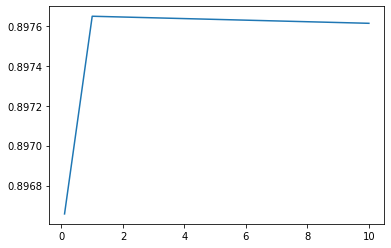

In [8]:
# Plot

accuracy_test = np.array(accuracy_test)
accuracy_train = np.array(accuracy_train)
a=accuracy_test[:,1]*100

plt.plot(C,accuracy_test[:,1])
Best1 =accuracy_test[ np.where(accuracy_test == np.max(accuracy_test[:,1]))[0]]
Best2 =accuracy_train[ np.where(accuracy_test == np.max(accuracy_test[:,1]))[0]]


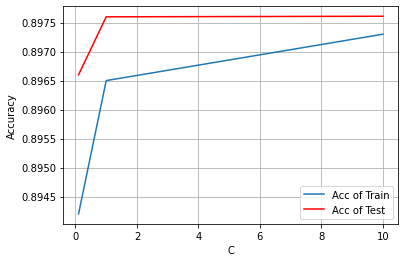

In [3]:
#PLOT
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([0.1,1,10])
y1TR = np.array([0.8942, 0.8965 ,0.8973])
x2 = np.array([0.1,1,10])
y2T = np.array([ 0.8966,0.8976,0.89761])
plt.plot(x1, y1TR, x2, y2T,'r')

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['Acc of Train', 'Acc of Test']);
plt.grid()
plt.show()